<a href="https://colab.research.google.com/github/piaseckazaneta/CV/blob/master/Project1_RiceLeafDiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import shutil
import random
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/operations/check.py", line 103, in check_install_conflicts
    would_be_installed = _simulate_installation_of(to_install, package_set)
  Fil

1. Loading data

In [5]:
base_dir = '/content/drive/MyDrive/Project1_RiceLeafDiseases/rice_leaf_diseases'
print(os.listdir(base_dir))  # Wyświetla foldery chorób


['Bacterial leaf blight', 'Leaf smut', 'Brown spot']


3. Wczytanie danych przy użyciu image_dataset_from_directory
TensorFlow dostarcza funkcji image_dataset_from_directory, która automatycznie wczytuje dane z folderów.

a) Wczytanie zbiorów treningowego,walidacyjnego i testowego:

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

b) Utwórz nowe foldery dla podziału danych.

Najpierw utwórz foldery dla zbiorów treningowego, walidacyjnego i testowego:

In [7]:
base_dir = '/content/drive/MyDrive/Project1_RiceLeafDiseases/rice_leaf_diseases'  # Ścieżka do folderu z danymi

# Ścieżka do folderów docelowych
output_dir = '/content/drive/MyDrive/Project1_RiceLeafDiseases/split_data'
os.makedirs(output_dir, exist_ok=True)

for split in ['train', 'val', 'test']:
    for category in os.listdir(base_dir):
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)


c) Podziel dane na zbiory


W tym kroku wybierzesz proporcje podziału (np. 70% danych na trening, 20% na walidację, 10% na test).

In [ ]:
# Proporcje podziału
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Podział danych
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)  # Wymieszaj dane losowo

    # Oblicz liczbę próbek dla każdego zbioru
    train_count = int(len(images) * train_ratio)
    val_count = int(len(images) * val_ratio)

    # Podziel dane
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Przenieś pliki do odpowiednich folderów
    for image in train_images:
        shutil.copy(os.path.join(category_path, image),
                    os.path.join(output_dir, 'train', category, image))

    for image in val_images:
        shutil.copy(os.path.join(category_path, image),
                    os.path.join(output_dir, 'val', category, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image),
                    os.path.join(output_dir, 'test', category, image))

print("Dane zostały podzielone!")

2. Zweryfikuj podział

Po wykonaniu podziału możesz sprawdzić, czy dane zostały poprawnie przeniesione:

In [8]:
# Liczba obrazów w każdym zbiorze
for split in ['train', 'val', 'test']:
    for category in os.listdir(base_dir):
        split_dir = os.path.join(output_dir, split, category)
        print(f"{split}/{category}: {len(os.listdir(split_dir))} obrazów")


train/Bacterial leaf blight: 28 obrazów
train/Leaf smut: 28 obrazów
train/Brown spot: 28 obrazów
val/Bacterial leaf blight: 8 obrazów
val/Leaf smut: 8 obrazów
val/Brown spot: 8 obrazów
test/Bacterial leaf blight: 4 obrazów
test/Leaf smut: 4 obrazów
test/Brown spot: 4 obrazów


3. Wczytaj dane do TensorFlow

Teraz możesz wczytać dane podzielone na zbiory przy użyciu image_dataset_from_directory:

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

data_dir = '/content/drive/MyDrive/Project1_RiceLeafDiseases/split_data'

# Wczytaj dane treningowe, walidacyjne i testowe
train_ds = image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    os.path.join(data_dir, 'val'),
    image_size=(224, 224),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    os.path.join(data_dir, 'test'),
    image_size=(224, 224),
    batch_size=32
)


Found 84 files belonging to 3 classes.
Found 24 files belonging to 3 classes.
Found 12 files belonging to 3 classes.


Weryfikacja zbioru testowego

Po wczytaniu zbioru testowego możesz sprawdzić, czy dane zostały poprawnie załadowane:

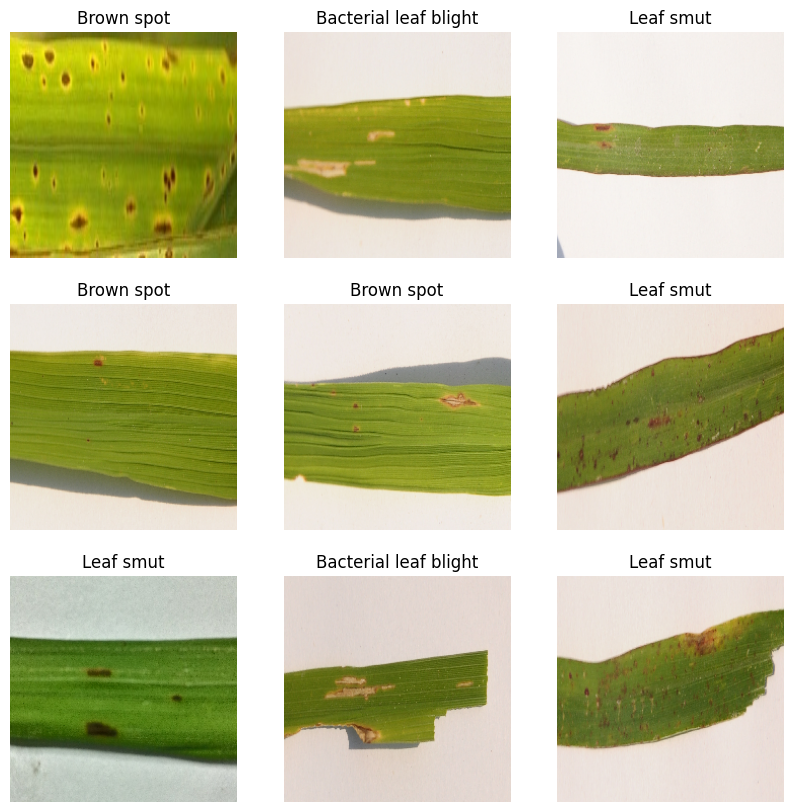

In [10]:
import matplotlib.pyplot as plt

# Wyświetlenie kilku obrazów z testowego
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):  # Pobranie pierwszego batcha
    for i in range(9):  # Wyświetlenie 9 obrazów
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
